##                                                            EDA ON NER Training dataset 

In [1]:
#Importing dependencies for EDA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import itertools
import spacy
from spacy import displacy

#Importing the below block to display all outputs 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Reading the file
df = pd.read_csv("ner_datasetreference.csv", encoding='latin')
df.head()
df.shape

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


(1048575, 4)

In [3]:
# Column 1 represents sentences, Words represents each word in a sentence , POS is Parts of Speach tagging of individual words.
# Tag Represents the NER tag of each words
df = df.fillna(method='ffill')
df["Sentence #"] = df["Sentence #"].apply(lambda s: s[9:]).astype("int32")
df.head()

,Sentence #,Word,POS,Tag
0,1,Thousands,NNS,O
1,1,of,IN,O
2,1,demonstrators,NNS,O
3,1,have,VBP,O
4,1,marched,VBN,O


In [4]:
print("Total number of sentences in the dataset: {:,}".format(df["Sentence #"].nunique()))
print("Total words in the dataset: {:,}".format(df.shape[0]))

Total number of sentences in the dataset: 47,959
Total words in the dataset: 1,048,575


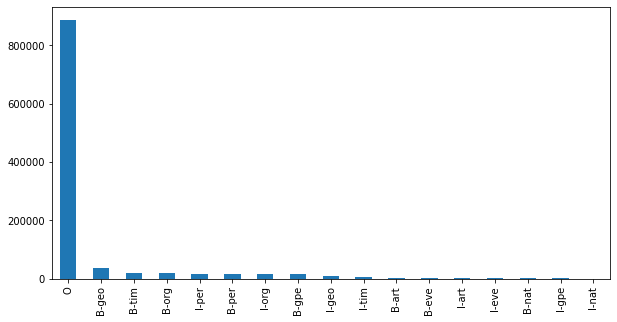

In [5]:
#Plotting the no of each tags
df["Tag"].value_counts().plot(kind="bar", figsize=(10,5)) 

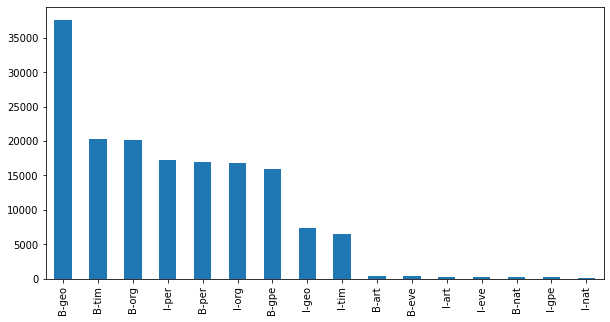

In [6]:
df[df["Tag"]!="O"]["Tag"].value_counts().plot(kind="bar", figsize=(10,5)) #Data has more O tags plotting without the O tags

In [7]:
df[df["Tag"]!="O"]["Tag"].value_counts()

B-geo    37644
B-tim    20333
B-org    20143
I-per    17251
B-per    16990
I-org    16784
B-gpe    15870
I-geo     7414
I-tim     6528
B-art      402
B-eve      308
I-art      297
I-eve      253
B-nat      201
I-gpe      198
I-nat       51
Name: Tag, dtype: int64

In [8]:
# Looking at the top 10 most used words
# Exploring at the
df.Word.value_counts()[:10]

the    52573
.      47761
,      32754
of     26354
in     26323
to     23213
a      20481
and    19936
The    11313
's     10923
Name: Word, dtype: int64

In [9]:
#Upon investigate found out there were unwanted characters as below hence removing those latin characters 
replacement_dict = {'ë':'e','ü':'u',"\xa0":' ', 'é':'e', '\x93':' ','\x91':' ','\x97':' ','\x85':' ','\x94':' ','ö':'o' ,'°':' ', 
                   '\x92':' ','\x96':' '}

def cleanunicode(uncleanstring):
    returnstring = re.sub(r'[\xa0|é|ë|ü|\x93|\x91|\x97|\x85|\x94|ö|°|\x92|\x96]', lambda m: replacement_dict.get(m.group()), uncleanstring)
    returnstring = re.sub(r'http\S+',' ',returnstring) #removes hyperlinks if any
    returnstring = re.sub(r"[^\w\s\d\.\,\-]", '',returnstring ) #Removes punctuation except period, comma and hyphen
    returnstring = re.sub(r'\.(?!\d)','',returnstring) #removes periods after a word but not before a number
    returnstring = re.sub(r'\,(?!\d)','',returnstring) #removes commas after a word but not before a number 
    returnstring = re.sub(r"\-(?!\w)", '',returnstring) #removes hyphen is its not bounded by a word
    return returnstring

df['Word'] = df['Word'].apply(lambda x : cleanunicode(x))

In [10]:
print("Shape of actual dataframe : ",df.shape)
print("Shapre of unwanted rows : ", df[(df['Word'] == ' ') | (df['Word'] == '')].shape)
df = df[(df['Word'] != ' ') & (df['Word'] != '')]
print("Shape after removing unwanted words: ", df.shape)

Shape of actual dataframe :  (1048575, 4)
Shapre of unwanted rows :  (89311, 4)
Shape after removing unwanted words:  (959264, 4)


In [17]:
#Checking for null values
df[df.isnull().all(1)]
df.head()

,Sentence #,Word,POS,Tag


,Sentence #,Word,POS,Tag
0,1,Thousands,NNS,O
1,1,of,IN,O
2,1,demonstrators,NNS,O
3,1,have,VBP,O
4,1,marched,VBN,O


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3B05C87C8>]],
      dtype=object)

Text(0.5, 0, 'Bins of sentence with no of words')

Text(0, 0.5, 'No of words in sentences')

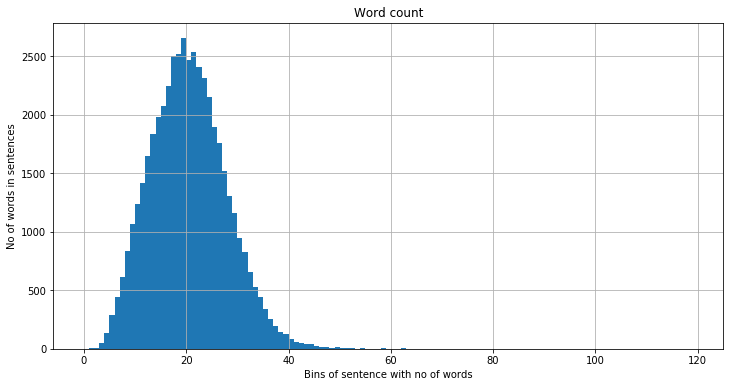

In [18]:
# Looking at the number of words in each sentence and plotting in a Histogram to look at the spread.
word_counts = df.groupby("Sentence #")["Word"].agg(["count"])
word_counts = word_counts.rename(columns={"count": "Word count"})

plotting_bins=np.arange(0,120,1)
word_counts.hist(bins=plotting_bins,figsize=(12,6))

# word_counts.hist(bins=100, figsize=(10,6))
plt.xlabel("Bins of sentence with no of words")
plt.ylabel("No of words in sentences")
plt.show()

In [19]:
MAX_SENTENCE = word_counts.max()[0]
MIN_SENTENCE = word_counts.min()[0]
print("Longest sentence in the corpus contains {} words.".format(MAX_SENTENCE))

Longest sentence in the corpus contains 77 words.


In [20]:
longest_sentence_id = word_counts[word_counts["Word count"]==MAX_SENTENCE].index[0]
print("ID of the longest sentence is {}.".format(longest_sentence_id))
shortest_sentence_id = word_counts[word_counts["Word count"]==MIN_SENTENCE].index[0]
print("ID of the Shortest sentence is {}.".format(shortest_sentence_id))

ID of the longest sentence is 22480.
ID of the Shortest sentence is 8412.


In [21]:
print("Longest Sentence :\n ", ' '.join(df[df["Sentence #"] == longest_sentence_id]["Word"]))
print("\nShortest Sentence :\n ", ' '.join(df[df["Sentence #"] == shortest_sentence_id]["Word"]))

Longest Sentence :
  Fisheries in 2006 7 landed 1,26,976 metric tons of which 82 1,04,586 tons was krill Euphausia superba and 9.5 12,027 tons Patagonian toothfish Dissostichus eleginoides also known as Chilean sea bass compared to 1,27,910 tons in 2005 6 of which 83 1,06,591 tons was krill and 9.7 12,396 tons Patagonian toothfish estimated fishing from the area covered by the Convention of the Conservation of Antarctic Marine Living Resources CCAMLR which extends slightly beyond the Southern Ocean area

Shortest Sentence :
  The


In [22]:
#Exploring top twenty short sentences
for index, row in word_counts.sort_values('Word count', ascending=True).head(20).iterrows():
    print("Sentence : ", ' '.join(df[df["Sentence #"] == index]["Word"]))

Sentence :  The
Sentence :  Thursday
Sentence :  Questions
Sentence :  John Garang
Sentence :  Bermet Akayeva
Sentence :  Fifteen dollars
Sentence :  It was
Sentence :  IRAQ-POVERTY Washington
Sentence :  Janice Karpinski
Sentence :  Ojedokun Tuesday
Sentence :  Niger 154th
Sentence :  John Garang
Sentence :  Jim Bertel narrates
Sentence :  She remains hospitalized
Sentence :  Diapers remained unchanged
Sentence :  Abstain and enjoy
Sentence :  Paul Sisco reports
Sentence :  Jim Bertel narrates
Sentence :  Paper was stationary
Sentence :  The NASA Missions


In [28]:
#Lowering all the words to reduce the no of words in vocab
df["Word"] = df["Word"].apply(lambda x: x.lower())

In [29]:
# Creating a list of all unique words and unique tags
all_words = list(set(df["Word"].values))
all_tags = list(set(df["Tag"].values))
print("Number of unique words: {}".format(len(all_words)))
print("Number of unique tags : {}".format(len(all_tags)))

Number of unique words: 31672
Number of unique tags : 17


In [30]:
# Creating a dictionary of of unique words and assigning a unique index number similarly to NER tags as well 
word2index = {word: idx + 2 for idx, word in enumerate(all_words)}
word2index["UNKNOWN_WORD"]=0
word2index["PADDING"]= 1
tag2index = {tag: idx + 1 for idx, tag in enumerate(all_tags)}
tag2index["PADDING"] = 0
print(dict(list(word2index.items())[0:5])) ## Dislaying 5 samples
print(dict(list(tag2index.items())[0:5]))

{'dwarfed': 2, '158': 3, 'downpour': 4, 'symbolize': 5, 'forwarded': 6}
{'B-gpe': 1, 'I-tim': 2, 'I-org': 3, 'B-nat': 4, 'I-eve': 5}


In [31]:
len(word2index)
len(tag2index)

31674

18

In [33]:
#Creating a colum with unique indexes for words and NER tags
df['Word_Index'] = df['Word'].map(word2index)
df['Tag_index'] = df['Tag'].map(tag2index) 
df.head()

,Sentence #,Word,POS,Tag,Word_Index,Tag_index
0,1,thousands,NNS,O,23178,15
1,1,of,IN,O,6354,15
2,1,demonstrators,NNS,O,10195,15
3,1,have,VBP,O,7329,15
4,1,marched,VBN,O,5463,15


In [34]:
%%time
#Creating a Shorter df dataframe
grouped_df = df.groupby(['Sentence #'],as_index=False)['Word', 'POS', 'Tag', 'Word_Index', 'Tag_index'].agg(lambda x: list(x))
grouped_df.head()

C:\Users\mr081025\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Wall time: 47.5 s


,Sentence #,Word,POS,Tag,Word_Index,Tag_index
0,1,"[thousands, of, demonstrators, have, marched, ...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[23178, 6354, 10195, 7329, 5463, 4810, 4488, 2...","[15, 15, 15, 15, 15, 15, 7, 15, 15, 15, 15, 15..."
1,2,"[families, of, soldiers, killed, in, the, conf...","[NNS, IN, NNS, VBN, IN, DT, NN, VBD, DT, NNS, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[13551, 6354, 19900, 29724, 18193, 31082, 7045...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1..."
2,3,"[they, marched, from, the, houses, of, parliam...","[PRP, VBD, IN, DT, NNS, IN, NN, TO, DT, NN, IN...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, I-geo]","[27209, 5463, 18327, 31082, 14972, 6354, 30182...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 7..."
3,4,"[police, put, the, number, of, marchers, at, 1...","[NNS, VBD, DT, NN, IN, NNS, IN, CD, IN, NNS, V...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[1187, 909, 31082, 29459, 6354, 3930, 25725, 2...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1..."
4,5,"[the, protest, comes, on, the, eve, of, the, a...","[DT, NN, VBZ, IN, DT, NN, IN, DT, JJ, NN, IN, ...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, O, O,...","[31082, 4664, 23686, 9240, 31082, 4321, 6354, ...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 7..."


In [35]:
#Number of sentences in the dataset
grouped_df.shape

(47958, 6)

In [37]:
# Looking at the percentage of sentence which as more than 40 words
print("The percentage of sentences which has more than 40 words is : ", round(word_counts[word_counts["Word count"] > 40].shape[0] / len(word_counts["Word count"]) * 100, 2),"%")

The percentage of sentences which has more than 40 words is :  0.67 %


In [38]:
#Padding the sentence for only 40 max length for each sentence for NLP modeling

grouped_df["Padded_Word_Index"] = grouped_df["Word_Index"].apply(lambda x: x + [word2index["PADDING"]] * (40 - len(x)) if (len(x) <=40) else x[:40])
grouped_df["Padded_Tag_Index"] = grouped_df["Tag_index"].apply(lambda x: x + [tag2index["PADDING"]] * (40 - len(x)) if (len(x) <=40) else x[:40])


In [39]:
grouped_df.head()

,Sentence #,Word,POS,Tag,Word_Index,Tag_index,Padded_Word_Index,Padded_Tag_Index
0,1,"[thousands, of, demonstrators, have, marched, ...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[23178, 6354, 10195, 7329, 5463, 4810, 4488, 2...","[15, 15, 15, 15, 15, 15, 7, 15, 15, 15, 15, 15...","[23178, 6354, 10195, 7329, 5463, 4810, 4488, 2...","[15, 15, 15, 15, 15, 15, 7, 15, 15, 15, 15, 15..."
1,2,"[families, of, soldiers, killed, in, the, conf...","[NNS, IN, NNS, VBN, IN, DT, NN, VBD, DT, NNS, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[13551, 6354, 19900, 29724, 18193, 31082, 7045...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...","[13551, 6354, 19900, 29724, 18193, 31082, 7045...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1..."
2,3,"[they, marched, from, the, houses, of, parliam...","[PRP, VBD, IN, DT, NNS, IN, NN, TO, DT, NN, IN...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, I-geo]","[27209, 5463, 18327, 31082, 14972, 6354, 30182...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 7...","[27209, 5463, 18327, 31082, 14972, 6354, 30182...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 7..."
3,4,"[police, put, the, number, of, marchers, at, 1...","[NNS, VBD, DT, NN, IN, NNS, IN, CD, IN, NNS, V...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[1187, 909, 31082, 29459, 6354, 3930, 25725, 2...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...","[1187, 909, 31082, 29459, 6354, 3930, 25725, 2...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1..."
4,5,"[the, protest, comes, on, the, eve, of, the, a...","[DT, NN, VBZ, IN, DT, NN, IN, DT, JJ, NN, IN, ...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, O, O,...","[31082, 4664, 23686, 9240, 31082, 4321, 6354, ...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 7...","[31082, 4664, 23686, 9240, 31082, 4321, 6354, ...","[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 7..."


In [41]:
# Looking at the first sentence to double check if the tags are saved properly.
print(grouped_df.iloc[0,1])
print(grouped_df.iloc[0,3])
print(grouped_df.iloc[0,4])
print(len(grouped_df.iloc[0,4]))
print(grouped_df.iloc[0,5])
print(len(grouped_df.iloc[0,5]))
print(grouped_df.iloc[0,6])
print(len(grouped_df.iloc[0,6]))
print(grouped_df.iloc[0,7])
print(len(grouped_df.iloc[0,7]))

['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country']
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O']
[23178, 6354, 10195, 7329, 5463, 4810, 4488, 26357, 4664, 31082, 15117, 18193, 5713, 12635, 30991, 31082, 3475, 6354, 24377, 27215, 18327, 8775, 28815]
23
[15, 15, 15, 15, 15, 15, 7, 15, 15, 15, 15, 15, 7, 15, 15, 15, 15, 15, 1, 15, 15, 15, 15]
23
[23178, 6354, 10195, 7329, 5463, 4810, 4488, 26357, 4664, 31082, 15117, 18193, 5713, 12635, 30991, 31082, 3475, 6354, 24377, 27215, 18327, 8775, 28815, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
40
[15, 15, 15, 15, 15, 15, 7, 15, 15, 15, 15, 15, 7, 15, 15, 15, 15, 15, 1, 15, 15, 15, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
40


In [42]:
# Saving this df for different model training
grouped_df.to_csv("Ner_ModelReady_data_strict_cleaned.csv", index=False)

In [43]:
#Saving the Word2Index as Json file
import json

with open('word2index_strict_cleaned.json', 'w') as fp:
    json.dump(word2index, fp)

with open('tag2index_strict_cleaned.json', 'w') as fp:
    json.dump(tag2index, fp)

##  ------BiLSTM - Model--------

In [44]:
#Converting the input and target values into list of list.
X = [i for i in grouped_df["Padded_Word_Index"]]
y = [i for i in grouped_df["Padded_Tag_Index"]]

In [45]:
# One hot encoding the target variable as each word has 18 different possibilities
from tensorflow.keras.utils import to_categorical 
y = [to_categorical(i, num_classes=len(tag2index)) for i in y]

In [46]:
# Looking at the first index for the tags.
for token, tag in zip(X[0], y[0]):
    print('%s\t%s' % (token, tag))

23178	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
6354	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
10195	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7329	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
5463	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
4810	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
4488	[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
26357	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
4664	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
31082	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
15117	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
18193	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
5713	[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
12635	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
30991	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
31082	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
3475	[0. 0. 0. 

In [47]:
#Spliting the data to train test split using 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [48]:
#conveting the data into array to feed data into model
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [49]:
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [238]:
#Specifying fixed hyper parameters
sentence_length = 40 # Number of words in a sentnece passed as input to the model
total_unique_words = len(word2index)

In [51]:
from kerastuner.tuners import RandomSearch
import kerastuner
from tensorflow.keras.optimizers import Adam
import tensorflow


def build_model(hp):
    model = Sequential()
    hp_units = hp.Int('out_dim', min_value=20, max_value=60, step=20)
    model.add(Embedding(input_dim=total_unique_words, output_dim=hp_units ,input_length=sentence_length))
    model.add(SpatialDropout1D(0.1))
    
    hp_units = hp.Int('units', min_value=50, max_value=100, step=25)
    model.add(Bidirectional(LSTM(units=hp_units, return_sequences=True, recurrent_dropout=0.1)))
    
    model.add(TimeDistributed(Dense(18, activation='softmax')))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective=kerastuner.Objective('val_loss', direction="min"),
    max_trials=10,
    executions_per_trial=1,
    directory='BiLSTM_Strick_Cleaned',
    project_name='BiLSTM_Trial')

tuner.search_space_summary()

C:\Users\mr081025\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


Search space summary
Default search space size: 3
out_dim (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 60, 'step': 20, 'sampling': None}
units (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 25, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [52]:
#Searching for best hyper parameter by randomly selecting 10 different combinations
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2) 
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test,y_test),callbacks=[stop_early])

Trial 10 Complete [00h 09m 40s]
val_loss: 0.06949508190155029

Best val_loss So Far: 0.06828252971172333
Total elapsed time: 01h 36m 34s
INFO:tensorflow:Oracle triggered exit


In [53]:
#Looking at the summary to get the best judge of hyper paramaters used and the validation loss for each
tuner.results_summary()

Results summary
Results in BiLSTM_Strick_Cleaned\BiLSTM_Trial
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
out_dim: 40
units: 100
learning_rate: 0.01
Score: 0.06828252971172333
Trial summary
Hyperparameters:
out_dim: 40
units: 75
learning_rate: 0.01
Score: 0.06876826286315918
Trial summary
Hyperparameters:
out_dim: 60
units: 75
learning_rate: 0.01
Score: 0.06949508190155029
Trial summary
Hyperparameters:
out_dim: 20
units: 75
learning_rate: 0.01
Score: 0.07048071175813675
Trial summary
Hyperparameters:
out_dim: 40
units: 50
learning_rate: 0.001
Score: 0.07180722057819366
Trial summary
Hyperparameters:
out_dim: 20
units: 75
learning_rate: 0.001
Score: 0.07305414229631424
Trial summary
Hyperparameters:
out_dim: 60
units: 100
learning_rate: 0.0001
Score: 0.11894536763429642
Trial summary
Hyperparameters:
out_dim: 60
units: 75
learning_rate: 0.0001
Score: 0.12107037007808685
Trial summary
Hyperparameters:
out_dim: 20
units: 100
learning_

In [56]:
#printing the best hyper parameters as per the tuner.
best_hps=tuner.get_best_hyperparameters()[0]

print(f"""
The hyperparameter search is complete. 
The optimal number of neurons for BiLSTM layer is {best_hps.get('units')},
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')} and
The No of dimentions of the Embedding o/p is {best_hps.get('out_dim')}.
""")


The hyperparameter search is complete. 
The optimal number of neurons for BiLSTM layer is 100,
The optimal learning rate for the optimizer is 0.01 and
The No of dimentions of the Embedding o/p is 40.



In [57]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))
#checking which Epoch had the lowest val_loss
val_acc_per_epoch = history.history['val_loss']
best_epoch = val_acc_per_epoch.index(min(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10
1199/1199 [==============================] - 197s 158ms/step - loss: 0.1214 - accuracy: 0.9665 - val_loss: 0.0702 - val_accuracy: 0.9788
Epoch 2/10
1199/1199 [==============================] - 184s 153ms/step - loss: 0.0583 - accuracy: 0.9818 - val_loss: 0.0689 - val_accuracy: 0.9791
Epoch 3/10
1199/1199 [==============================] - 189s 158ms/step - loss: 0.0480 - accuracy: 0.9846 - val_loss: 0.0707 - val_accuracy: 0.9790
Epoch 4/10
1199/1199 [==============================] - 191s 159ms/step - loss: 0.0429 - accuracy: 0.9859 - val_loss: 0.0752 - val_accuracy: 0.9787
Epoch 5/10
1199/1199 [==============================] - 184s 153ms/step - loss: 0.0402 - accuracy: 0.9867 - val_loss: 0.0764 - val_accuracy: 0.9784
Epoch 6/10
1199/1199 [==============================] - 191s 159ms/step - loss: 0.0382 - accuracy: 0.9874 - val_loss: 0.0794 - val_accuracy: 0.9787
Epoch 7/10
1199/1199 [==============================] - 189s 158ms/step - loss: 0.0369 - accuracy: 0.9878 - val_

<Figure size 864x576 with 0 Axes>

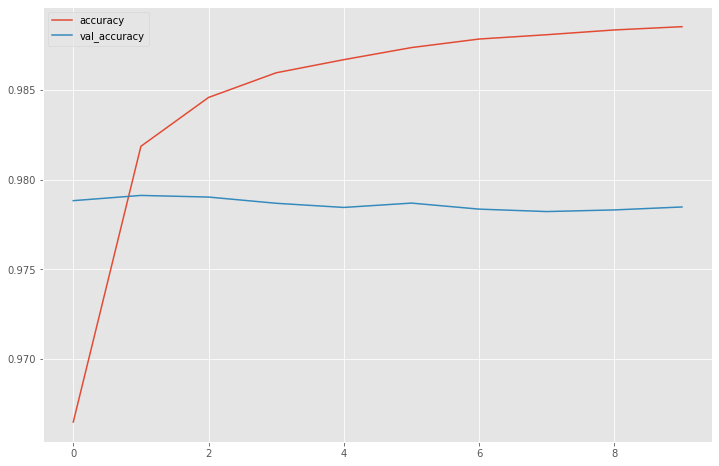

In [58]:
#Plotting Accuracy vs Validation accuracy
hist = pd.DataFrame(history.history)
plt.style.use("ggplot")
plt.figure(figsize=(12, 8))
plt.plot(hist["accuracy"],  label ='accuracy')
plt.plot(hist["val_accuracy"], label ='val_accuracy')
plt.legend()
plt.show()

<Figure size 864x576 with 0 Axes>

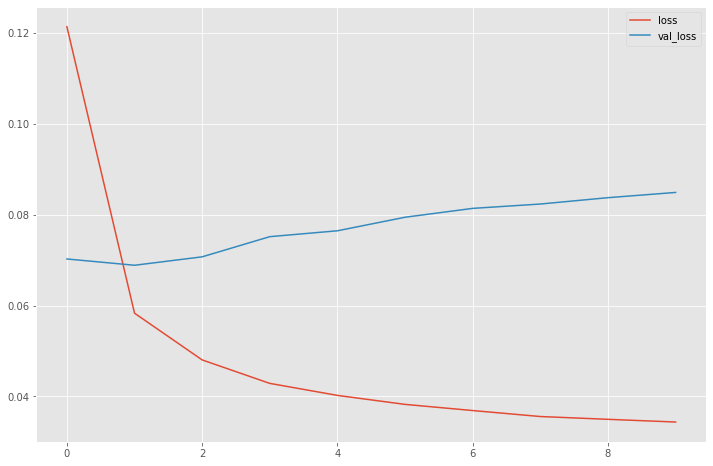

In [59]:
#Plotting Loss vs Validation loss
hist = pd.DataFrame(history.history)
plt.style.use("ggplot")
plt.figure(figsize=(12, 8))
plt.plot(hist["loss"],  label ='loss')
plt.plot(hist["val_loss"], label ='val_loss')
plt.legend()
plt.show()

In [83]:
#Re-instantiate the hypermodel and train it with the optimal number of epochs from above.
stop_early_final = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,restore_best_weights=True) 
hypermodel_strict_clean = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel_strict_clean.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test),callbacks=[stop_early_final])

Epoch 1/5
1199/1199 [==============================] - 233s 188ms/step - loss: 0.1223 - accuracy: 0.9662 - val_loss: 0.0707 - val_accuracy: 0.9786
Epoch 2/5
1199/1199 [==============================] - 220s 184ms/step - loss: 0.0584 - accuracy: 0.9818 - val_loss: 0.0686 - val_accuracy: 0.9794
Epoch 3/5
1199/1199 [==============================] - 217s 181ms/step - loss: 0.0475 - accuracy: 0.9847 - val_loss: 0.0717 - val_accuracy: 0.9793
Epoch 4/5
1199/1199 [==============================] - 224s 187ms/step - loss: 0.0421 - accuracy: 0.9861 - val_loss: 0.0754 - val_accuracy: 0.9789


In [84]:
#Self model 1 with params = output_dim = 40, units=100 and learning_rate=0.01
custom_model_1 = Sequential()
custom_model_1.add(Embedding(input_dim=total_unique_words, output_dim=40 ,input_length=sentence_length))
custom_model_1.add(SpatialDropout1D(0.1))
custom_model_1.add(Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)))    
custom_model_1.add(TimeDistributed(Dense(18, activation='softmax')))
custom_model_1.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
custom_model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 40, 40)            1266960   
                                                                 
 spatial_dropout1d_8 (Spatia  (None, 40, 40)           0         
 lDropout1D)                                                     
                                                                 
 bidirectional_8 (Bidirectio  (None, 40, 200)          112800    
 nal)                                                            
                                                                 
 time_distributed_8 (TimeDis  (None, 40, 18)           3618      
 tributed)                                                       
                                                                 
Total params: 1,383,378
Trainable params: 1,383,378
Non-trainable params: 0
____________________________________________

In [85]:
#Looking at the results of custom model 1
custom_model_1.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test),callbacks=[stop_early_final])

Epoch 1/5
1199/1199 [==============================] - 225s 182ms/step - loss: 0.1151 - accuracy: 0.9676 - val_loss: 0.0720 - val_accuracy: 0.9780
Epoch 2/5
1199/1199 [==============================] - 217s 181ms/step - loss: 0.0578 - accuracy: 0.9820 - val_loss: 0.0689 - val_accuracy: 0.9794
Epoch 3/5
1199/1199 [==============================] - 206s 172ms/step - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0717 - val_accuracy: 0.9783
Epoch 4/5
1199/1199 [==============================] - 215s 179ms/step - loss: 0.0430 - accuracy: 0.9860 - val_loss: 0.0723 - val_accuracy: 0.9790


In [86]:
#Self model 1 with params = output_dim = 20, units=50 and learning_rate=0.01
custom_model_2 = Sequential()
custom_model_2.add(Embedding(input_dim=total_unique_words, output_dim=20 ,input_length=sentence_length))
custom_model_2.add(SpatialDropout1D(0.1))
custom_model_2.add(Bidirectional(LSTM(units=50, return_sequences=True, recurrent_dropout=0.1)))    
custom_model_2.add(TimeDistributed(Dense(18, activation='softmax')))
custom_model_2.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
custom_model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 40, 20)            633480    
                                                                 
 spatial_dropout1d_9 (Spatia  (None, 40, 20)           0         
 lDropout1D)                                                     
                                                                 
 bidirectional_9 (Bidirectio  (None, 40, 100)          28400     
 nal)                                                            
                                                                 
 time_distributed_9 (TimeDis  (None, 40, 18)           1818      
 tributed)                                                       
                                                                 
Total params: 663,698
Trainable params: 663,698
Non-trainable params: 0
________________________________________________

In [87]:
#Looking at the results of custom model 2
custom_model_2.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test),callbacks=[stop_early_final])

Epoch 1/5
1199/1199 [==============================] - 93s 69ms/step - loss: 0.1368 - accuracy: 0.9632 - val_loss: 0.0755 - val_accuracy: 0.9774
Epoch 2/5
1199/1199 [==============================] - 80s 67ms/step - loss: 0.0630 - accuracy: 0.9807 - val_loss: 0.0702 - val_accuracy: 0.9788
Epoch 3/5
1199/1199 [==============================] - 80s 67ms/step - loss: 0.0518 - accuracy: 0.9835 - val_loss: 0.0715 - val_accuracy: 0.9790
Epoch 4/5
1199/1199 [==============================] - 78s 65ms/step - loss: 0.0470 - accuracy: 0.9848 - val_loss: 0.0731 - val_accuracy: 0.9786


In [88]:
#Replacing the tag indexes with tags and predicting on test data
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

hypermodel_pred = hypermodel_strict_clean.predict(X_test, verbose=1)
custom_model_1_pred = custom_model_1.predict(X_test, verbose=1)
custom_model_2_pred = custom_model_2.predict(X_test, verbose=1)

idx2tag = {i: w for w, i in tag2index.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PADDING", "O"))
        out.append(out_i)
    return out
    
hypermodel_pred_labels = pred2label(hypermodel_pred)
custom_model_1_labels = pred2label(custom_model_1_pred)
custom_model_2_labels = pred2label(custom_model_2_pred)
test_labels = pred2label(y_test)

300/300 [==============================] - 4s 11ms/step


In [89]:
#Checking for weighted f1 score and classification report
print("Hyper Parameter Tuned model F1-score: {:.1%}".format(f1_score(test_labels, hypermodel_pred_labels)))
print("Custom Parameters model 1 F1-score: {:.1%}".format(f1_score(test_labels, custom_model_1_labels)))
print("Custom Parameters model 2 F1-score: {:.1%}".format(f1_score(test_labels, custom_model_2_labels)))

Hyper Parameter Tuned model F1-score: 79.2%
Custom Parameters model 1 F1-score: 79.3%
Custom Parameters model 2 F1-score: 78.6%


In [90]:
print("Classification Report of Hyper paramater tuned model")
print(classification_report(test_labels, hypermodel_pred_labels))
print("Classification Report of Custom model 1")
print(classification_report(test_labels, custom_model_1_labels))
print("Classification Report of Custom model 2")
print(classification_report(test_labels, custom_model_2_labels))

Classification Report of Hyper paramater tuned model
              precision    recall  f1-score   support

         art       0.17      0.03      0.05        75
         eve       0.45      0.31      0.37        55
         geo       0.83      0.86      0.84      7495
         gpe       0.95      0.94      0.95      3172
         nat       0.58      0.17      0.26        42
         org       0.58      0.58      0.58      3968
         per       0.73      0.72      0.72      3452
         tim       0.86      0.85      0.85      4003

   micro avg       0.79      0.79      0.79     22262
   macro avg       0.64      0.56      0.58     22262
weighted avg       0.79      0.79      0.79     22262

Classification Report of Custom model 1
              precision    recall  f1-score   support

         art       0.43      0.08      0.13        75
         eve       0.25      0.27      0.26        55
         geo       0.80      0.88      0.84      7495
         gpe       0.97      0.93      

In [94]:
#Predictin on Test dataset
def get_key(val,diction):
    for key, value in diction.items():
        if val == value:
            return key

i = np.random.randint(0, X_test.shape[0])

h_p = hypermodel_strict_clean.predict(np.array([X_test[i]]))
c1_p = custom_model_1.predict(np.array([X_test[i]]))
c2_p = custom_model_2.predict(np.array([X_test[i]]))

h_p = np.argmax(h_p, axis=-1)
c1_p = np.argmax(c1_p, axis=-1)
c2_p = np.argmax(c2_p, axis=-1)

y_true = np.argmax(np.array(y_test), axis=-1)[i]

print("{:15}{:10}{:10}{:10}{:10}".format("Word", "True", "HM_Pred","C1_Pred","C2_Pred"))
print("-"*50)

for (w, t, h_p,c1_p,c2_p) in zip(X_test[i], y_true, h_p[0], c1_p[0],c2_p[0]):
    if get_key(w,word2index) == 'PADDING':
        pass
    else:
        print("{:15}{:10}{:10}{:10}{:10}".format(get_key(w,word2index), get_key(t,tag2index), get_key(h_p,tag2index), get_key(c1_p,tag2index), get_key(c2_p,tag2index)))

Word           True      HM_Pred   C1_Pred   C2_Pred   
--------------------------------------------------
after          O         O         O         O         
her            O         O         O         O         
talks          O         O         O         O         
in             O         O         O         O         
new            B-org     B-geo     B-geo     B-geo     
delhi          I-org     I-geo     I-geo     I-geo     
ms             B-per     B-per     B-per     B-per     
rice           I-per     I-per     I-per     I-per     
heads          O         O         O         O         
to             O         O         O         O         
pakistan       B-geo     B-geo     B-geo     B-geo     
and            O         O         O         O         
afghanistan    B-geo     B-geo     B-geo     B-geo     
before         O         O         O         O         
traveling      O         O         O         O         
to             O         O         O         O       

In [95]:
# Training model on complete dataset 
# With Hyper parameters 
# output_dim = 40, units=100 and learning_rate=0.01

Final_model_Strict_Clean = Sequential()
Final_model_Strict_Clean.add(Embedding(input_dim=total_unique_words, output_dim=40 ,input_length=sentence_length))
Final_model_Strict_Clean.add(SpatialDropout1D(0.1))
Final_model_Strict_Clean.add(Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)))    
Final_model_Strict_Clean.add(TimeDistributed(Dense(18, activation='softmax')))

Final_model_Strict_Clean.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
Final_model_Strict_Clean.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 40, 40)            1266960   
                                                                 
 spatial_dropout1d_10 (Spati  (None, 40, 40)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional_10 (Bidirecti  (None, 40, 200)          112800    
 onal)                                                           
                                                                 
 time_distributed_10 (TimeDi  (None, 40, 18)           3618      
 stributed)                                                      
                                                                 
Total params: 1,383,378
Trainable params: 1,383,378
Non-trainable params: 0
___________________________________________

In [98]:
#Fitting final model for two wpochs as all test training was overfitting for more number of epochs
Full_X_Train = np.array(X)
Full_Y_Train = np.array(y)
Final_model_Strict_Clean.fit(Full_X_Train, Full_Y_Train, epochs=2)

Epoch 1/2
1499/1499 [==============================] - 190s 127ms/step - loss: 0.0854 - accuracy: 0.9750
Epoch 2/2
1499/1499 [==============================] - 188s 125ms/step - loss: 0.0560 - accuracy: 0.9825


In [240]:
#saving the model
Final_model_Strict_Clean.save('TrainedModels/BiLSTM_Final_model_Strict_Clean.h5')

#### Predicting on Climate change dataset

In [200]:
#Readig the cleaned dataset
ClimateChange_DF = pd.read_csv("Cleaned_English_tweets.csv")
#keeping only the tweets
ClimateChange_DF = ClimateChange_DF[["CleanedTweets"]]
ClimateChange_DF.head()

,CleanedTweets
0,News Trends Data Americans are less concerned ...
1,Do you realize that civil war is the devastati...
2,Having anxiety over the weather something they...
3,In the last few years I've noticed that studen...
4,FULL INTERVIEW BTS ARMY BTSonGMA NEWS EXCLUSIV...


In [201]:
ClimateChange_DF.shape

(1557690, 1)

In [202]:
# Creating a list of word index with padding
ClimateChange_DF["Word"] = ClimateChange_DF["CleanedTweets"].apply(lambda x: str(x).lower().split())
ClimateChange_DF['Word_Index'] = ClimateChange_DF['Word'].apply(lambda x: [word2index[s] if s in word2index else word2index['UNKNOWN_WORD'] for s in x])
ClimateChange_DF["Padded_Word_Index"] = ClimateChange_DF["Word_Index"].apply(lambda x: x + [word2index["PADDING"]] * (40 - len(x)) if (len(x) <=40) else x[:40])

In [198]:
ClimateChange_DF.head()

,CleanedTweets,Word,Word_Index,Padded_Word_Index
0,News Trends Data Americans are less concerned ...,"[news, trends, data, americans, are, less, con...","[2165, 325, 9098, 19174, 14213, 11148, 14962, ...","[2165, 325, 9098, 19174, 14213, 11148, 14962, ..."
1,Do you realize that civil war is the devastati...,"[do, you, realize, that, civil, war, is, the, ...","[11989, 23784, 6400, 8775, 1376, 15117, 8950, ...","[11989, 23784, 6400, 8775, 1376, 15117, 8950, ..."
2,Having anxiety over the weather something they...,"[having, anxiety, over, the, weather, somethin...","[5249, 16605, 15306, 31082, 10820, 26137, 2720...","[5249, 16605, 15306, 31082, 10820, 26137, 2720..."
3,In the last few years I've noticed that studen...,"[in, the, last, few, years, i've, noticed, tha...","[18193, 31082, 27602, 3214, 21234, 0, 13170, 8...","[18193, 31082, 27602, 3214, 21234, 0, 13170, 8..."
4,FULL INTERVIEW BTS ARMY BTSonGMA NEWS EXCLUSIV...,"[full, interview, bts, army, btsongma, news, e...","[2986, 12730, 0, 24604, 0, 2165, 2281, 29986, ...","[2986, 12730, 0, 24604, 0, 2165, 2281, 29986, ..."


In [237]:
#Predictin on Test dataset
def get_key(val,diction):
    for key, value in diction.items():
        if val == value:
            return key

i = np.random.randint(0, ClimateChange_DF.Padded_Word_Index.shape[0])

h_p = Final_model_Strict_Clean.predict(np.array([ClimateChange_DF.Padded_Word_Index[i]]))

h_p = np.argmax(h_p, axis=-1)

print("{:20}{:20}{:10}".format("Actual Word", "Word", "True",))
print("-"*30)
for (m, w, t) in itertools.zip_longest(ClimateChange_DF.Word[i][:40], ClimateChange_DF.Padded_Word_Index[i], h_p[0]):
    if get_key(w,word2index) == 'PADDING':
        pass
    else:
        print("{:20}{:20}{:10}".format(str(m), get_key(w,word2index), get_key(t,tag2index)))

#Using Spacy to cross check for entities
nlp = spacy.load('en_core_web_sm')
text = nlp(ClimateChange_DF.CleanedTweets[i])
displacy.render(text, style = 'ent', jupyter=True)

Actual Word         Word                True      
------------------------------
morrison            UNKNOWN_WORD        O         
got                 got                 O         
cucked              UNKNOWN_WORD        O         
by                  by                  O         
barnaby             UNKNOWN_WORD        B-org     
morrison            UNKNOWN_WORD        I-org     
confirming          confirming          O         
in                  in                  O         
this                this                O         
qt                  UNKNOWN_WORD        B-tim     
he's                UNKNOWN_WORD        O         
given               given               O         
up                  up                  O         
on                  on                  O         
increasing          increasing          O         
the                 the                 O         
2030                2030                B-tim     
target              target              O         


In [ ]:
from tensorflow import keras
LoadedModel = keras.models.load_model('TrainedModels/Final_model_Strict_Clean')

#Reading the dictionaries back 
with open('word2index_strict_cleaned.json', 'r') as fp:
    word2index = json.load(fp)
    
with open('word2index_strict_cleaned.json', 'r') as fp:
    tag2index = json.load(fp)